# Tautochrone simulation

An animation of balls on a tautochrone curve, which is what is described in Taylor problem 6.25.  

Adapted from https://commons.wikimedia.org/wiki/File:Tautochrone_balls_full_oscillation.gif and https://commons.wikimedia.org/wiki/File:Tautochrone_curve.gif.

* v1: Last revised 12-Feb-2019 by Dick Furnstahl (furnstahl.1@osu.edu).


In [7]:
%matplotlib notebook

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation 

# To draw the "track": see https://matplotlib.org/api/patches_api.html
import matplotlib.patches as patches  


In [9]:
def cycloid(phi):
    """Parameterized cycloid.  
       (x,y) = (0,0) when phi = 0 and (x,y) = (pi,2) when phi = pi.
    """
    x = phi + np.sin(phi)
    y = 1.0 - np.cos(phi)
    return np.array([x, y])


In [10]:

def animate(nframe, empty=False):
    """
    Draw a new frame every time that has the ramp and the balls.
    """
    t = nframe / float(nframes)
    
    # prepare a clean and image-filling canvas for each frame
    fig = plt.gcf()
    fig.clf()
    ax_canvas = plt.gca()
    ax_canvas.set_position((0, 0, 1, 1))
    ax_canvas.set_xlim(0, width)
    ax_canvas.set_ylim(0, height)
    ax_canvas.axis('off')
    
    # draw the ramp
    x0, y0 = width//2, 18   # //2 mean round down to an integer
    h = 192
    npoints = 400
    points = []
    for i in range(npoints):
        phi = i / (npoints - 1.0) * 2 * np.pi - np.pi  # -pi < phi < pi
        x, y = h/2. * cycloid(phi) + np.array([x0, y0])
        points.append([x, y])
    
    # Draw the gray ramp and dark line on top (called rampline)
    rampline = patches.Polygon(points, closed=False, facecolor='none',
                       edgecolor='black', linewidth=4, capstyle='butt')
    # Add the lower right, lower left, and upper left points to be connected.
    points += [[x0+h*np.pi/2, y0], [x0-h*np.pi/2, y0], [x0-h*np.pi/2, y0+h]]
    # Now connect the points in a closed gray shape, with no edge marking.
    ramp = patches.Polygon(points, closed=True, facecolor='#c0c0c0', 
                           edgecolor='none')
    ax_canvas.add_patch(ramp)
    ax_canvas.add_patch(rampline)
    
    for b in balls:
        phi_pendulum = b['a'] * -np.cos(t * 2 * np.pi)
        phi_wheel = 2 * np.arcsin(phi_pendulum)
        x, y = h/2. * cycloid(phi_wheel) + np.array([x0, y0])
        ax_canvas.add_patch(patches.Circle((x, y), radius=10.,
                            facecolor=b['color'], edgecolor='black'))



<IPython.core.display.Javascript object>


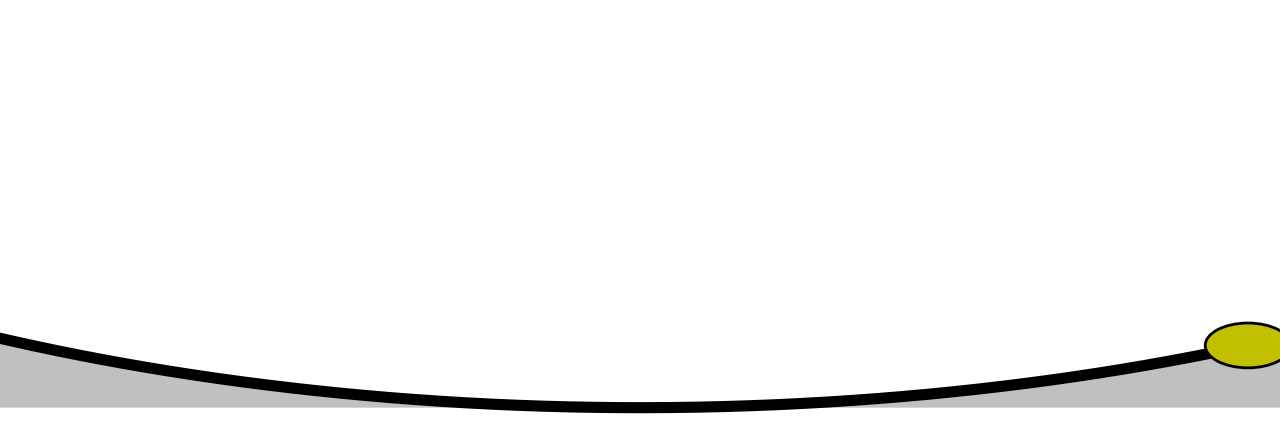

Saving Tautochrone_balls_full_oscillation.gif


In [11]:
# Settings
gif_filename = 'Tautochrone_balls_full_oscillation'  # filename for gif
width, height = 640, 224  # dimensions of each frame
nframes = 50  # number of frames
fps=20  # frames per second

# List of balls, with dict for each telling where it starts and what color
balls = [
         {'a':1.0, 'color':'#0000c0'},
         {'a':0.8, 'color':'#c00000'},
         {'a':0.6, 'color':'#00c000'},
         {'a':0.4, 'color':'#c0c000'}]


fig = plt.figure(figsize=(width/100., height/100.))
anim = animation.FuncAnimation(fig, animate, frames=nframes)

# Save as an animated gif
print('Saving', gif_filename + '.gif')
anim.save(gif_filename + '.gif', writer='imagemagick', fps=fps)

<IPython.core.display.Javascript object>


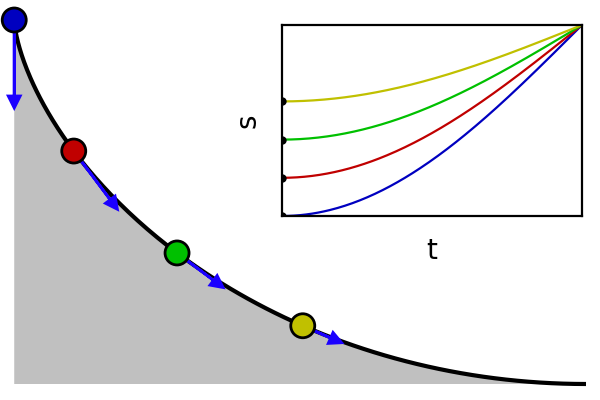

Saving Tautochrone_curve.gif


In [12]:
# settings
gif_filename2 = 'Tautochrone_curve'
width, height = 300, 200
nframes = 80
fps=25


def animate(nframe, empty=False):
    t = nframe / float(nframes - 1.)
    
    # prepare a clean and image-filling canvas for each frame
    fig = plt.gcf()
    fig.clf()
    ax_canvas = plt.gca()
    ax_canvas.set_position((0, 0, 1, 1))
    ax_canvas.set_xlim(0, width)
    ax_canvas.set_ylim(0, height)
    ax_canvas.axis('off')
    
    # draw the ramp
    x0, y0 = 293, 8
    h = 182
    npoints = 200
    points = []
    for i in range(npoints):
        phi = i / (npoints - 1.0) * np.pi - np.pi
        x, y = h/2. * cycloid(phi) + np.array([x0, y0])
        points.append([x, y])
    
    rampline = patches.Polygon(points, closed=False, facecolor='none',
                               edgecolor='black', linewidth=1.5, 
                               capstyle='butt')
    points += [[x0-h*np.pi/2, y0], [x0-h*np.pi/2, y0+h]]
    
    ramp = patches.Polygon(points, closed=True, 
                           facecolor='#c0c0c0', edgecolor='none')
    
    # plot axes
    plotw = 0.5
    ax_plot = fig.add_axes((0.47, 0.46, plotw, plotw*2./np.pi*width/height))
    ax_plot.set_xlim(0, 1)
    ax_plot.set_ylim(0, 1)
    for b in balls:
        time_array = np.linspace(0, 1, 201)
        phi_pendulum_array = (1 - b['a'] * np.cos(time_array * np.pi/2))
        ax_plot.plot(time_array, phi_pendulum_array, '-', 
                     color=b['color'], lw=.8)
    ax_plot.set_xticks([])
    ax_plot.set_yticks([])
    ax_plot.set_xlabel('t')
    ax_plot.set_ylabel('s')
    
    ax_canvas.add_patch(ramp)
    ax_canvas.add_patch(rampline)
    
    for b in balls:
        # draw the balls
        phi_pendulum = b['a'] * -np.cos(t * np.pi/2)
        phi_wheel = 2 * np.arcsin(phi_pendulum)
        phi_wheel = -abs(phi_wheel)
        x, y = h/2. * cycloid(phi_wheel) + np.array([x0, y0])
        ax_canvas.add_patch(patches.Circle((x, y), radius=6., zorder=3,
                            facecolor=b['color'], edgecolor='black'))
        ax_plot.plot([t], [1 + phi_pendulum], '.', ms=6., 
                     mec='none', mfc='black')
        
        v = h/2. * np.array([1 + np.cos(phi_wheel), np.sin(phi_wheel)])
        vnorm = v / np.hypot(v[0], v[1])
        # in the harmonic motion, acceleration is proportional to -position
        acc_along_line = 38. * -phi_pendulum * vnorm
        ax_canvas.arrow(x, y, acc_along_line[0], acc_along_line[1],
                        head_width=6, head_length=6, 
                        fc='#1b00ff', ec='#1b00ff')

fig = plt.figure(figsize=(width/100., height/100.), num='Tautochrone')
print('Saving', gif_filename2 + '.gif')
anim = animation.FuncAnimation(fig, animate, frames=nframes)
anim.save(gif_filename2 + '.gif', writer='imagemagick', fps=fps)

# frames = []
# for nframe in range(nframes):
#     frame = fname + '_{:02}.png'.format(nframe)
#     animation.FuncAnimation(fig, lambda n: animate(nframe), frames=1).save(
#         frame, writer='imagemagick')
#     frames.append(frame)

# # assemble animation using imagemagick, this avoids dithering and huge filesize
# os.system('convert -delay {} +dither +remap -layers Optimize {} "{}"'.format(
#     100//fps, ' '.join(['"' + f + '"' for f in frames]), fname + '.gif'))
# for frame in frames:
#     if os.path.exists(frame):
#         os.remove(frame)